In [151]:
# Import required libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [153]:
# Import the Dataset
dataset = pd.read_csv("wine.csv")

In [154]:
# View the number of rows and columns in our dataset
dataset.shape

(178, 14)

In [155]:
# Inspect the first five records of the dataset
dataset.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [156]:
# Divide the data into attributes and labels
x = dataset.drop('Wine', axis=1)
y = dataset['Wine']

In [157]:
# Here the X variable contains all the columns from the dataset, except the "Class" column. 
# The y variable contains the values from the "Class" column. 
# The X variable is the attribute set and y variable contains corresponding labels.

In [158]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split
s=0.5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50)

In [159]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [160]:
len(y_test)

89

In [161]:
#y_pred = classifier.predict(x_test)
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Accuracy')

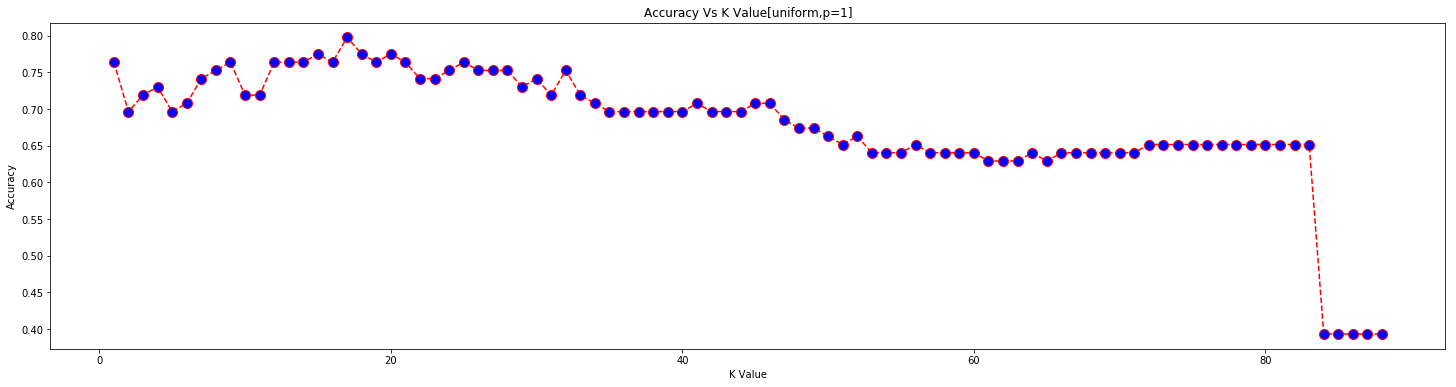

In [162]:
accuracy = []
for i in range(1, len(y_test)):
    knn = KNeighborsClassifier(n_neighbors=i,weights="uniform",p=1)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
plt.figure(figsize=(25, 6))
plt.plot(range(1, len(y_test)), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Vs K Value[uniform,p=1]')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [163]:
max_index=accuracy.index(max(accuracy))
for i in range(30):
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.50)
    knn = KNeighborsClassifier(n_neighbors=max_index+1,weights="uniform",p=1)
    knn.fit(x_train_new, y_train_new)
    pred_i = knn.predict(x_test_new)
    print(metrics.accuracy_score(y_test_new, pred_i))

0.7191011235955056
0.7303370786516854
0.7640449438202247
0.6853932584269663
0.6853932584269663
0.7415730337078652
0.7865168539325843
0.7415730337078652
0.7303370786516854
0.7640449438202247
0.7303370786516854
0.7415730337078652
0.7078651685393258
0.6741573033707865
0.7078651685393258
0.6966292134831461
0.7078651685393258
0.7303370786516854
0.7528089887640449
0.7528089887640449
0.651685393258427
0.6853932584269663
0.7303370786516854
0.7415730337078652
0.7528089887640449
0.7640449438202247
0.7191011235955056
0.8314606741573034
0.6741573033707865
0.7415730337078652


Text(0,0.5,'Accuracy')

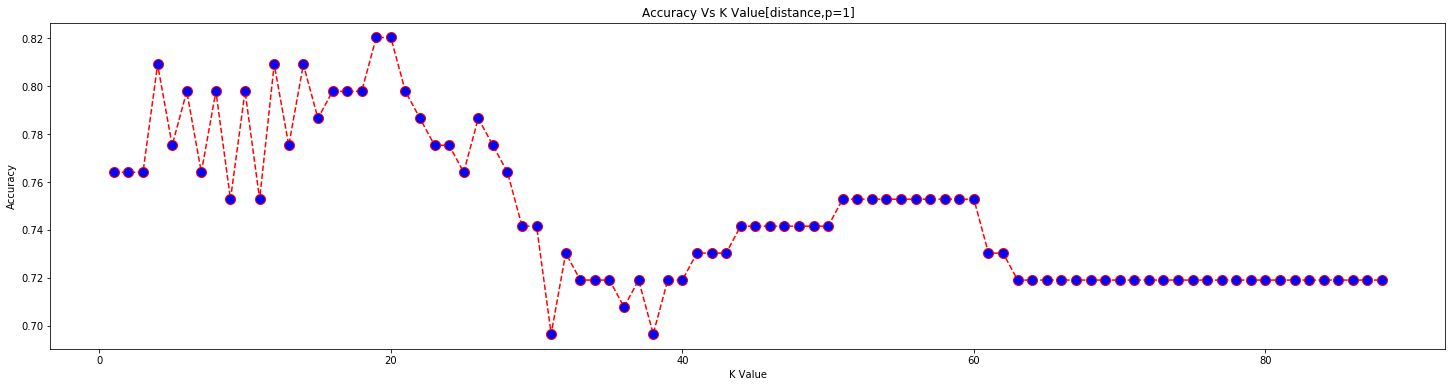

In [164]:
accuracy = []
for i in range(1, len(y_test)):
    knn = KNeighborsClassifier(n_neighbors=i,weights="distance",p=1)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
plt.figure(figsize=(25, 6))
plt.plot(range(1, len(y_test)), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Vs K Value[distance,p=1]')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [165]:
max_index=accuracy.index(max(accuracy))
for i in range(30):
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.40)
    knn = KNeighborsClassifier(n_neighbors=max_index+1,weights="distance",p=1)
    knn.fit(x_train_new, y_train_new)
    pred_i = knn.predict(x_test_new)
    print(metrics.accuracy_score(y_test_new, pred_i))

0.7916666666666666
0.7083333333333334
0.7777777777777778
0.75
0.7777777777777778
0.7777777777777778
0.6944444444444444
0.875
0.7222222222222222
0.7361111111111112
0.9166666666666666
0.8055555555555556
0.7361111111111112
0.7361111111111112
0.8472222222222222
0.7638888888888888
0.75
0.7361111111111112
0.8333333333333334
0.7777777777777778
0.7777777777777778
0.75
0.7361111111111112
0.8055555555555556
0.6944444444444444
0.7361111111111112
0.7916666666666666
0.6944444444444444
0.875
0.7638888888888888


Text(0,0.5,'Accuracy')

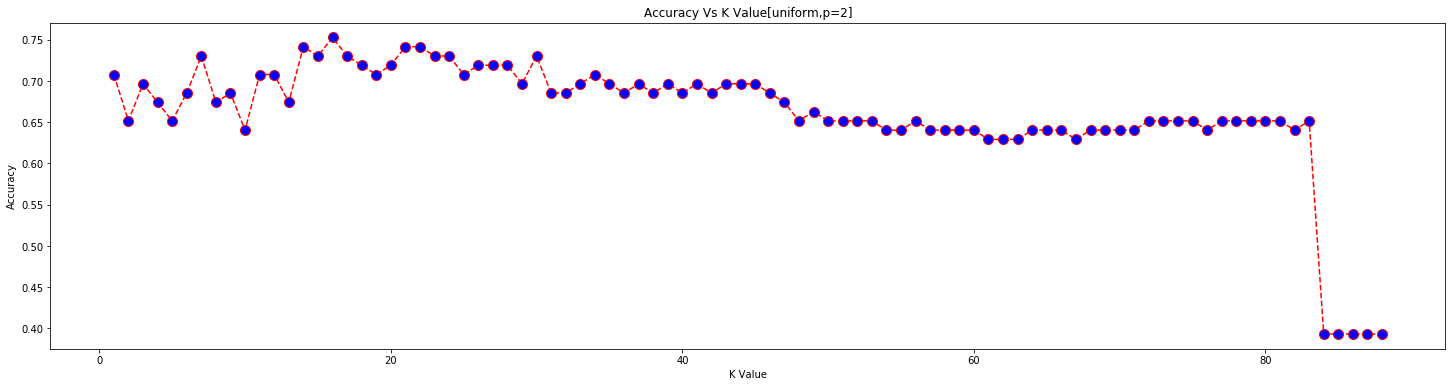

In [166]:
accuracy = []
for i in range(1, len(y_test)):
    knn = KNeighborsClassifier(n_neighbors=i,weights="uniform",p=2)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
plt.figure(figsize=(25, 6))
plt.plot(range(1, len(y_test)), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Vs K Value[uniform,p=2]')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [167]:
max_index=accuracy.index(max(accuracy))
for i in range(30):
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.40)
    knn = KNeighborsClassifier(n_neighbors=max_index+1,weights="uniform",p=2)
    knn.fit(x_train_new, y_train_new)
    pred_i = knn.predict(x_test_new)
    print(metrics.accuracy_score(y_test_new, pred_i))

0.7083333333333334
0.6388888888888888
0.6805555555555556
0.7222222222222222
0.6527777777777778
0.7222222222222222
0.6805555555555556
0.6944444444444444
0.6666666666666666
0.6666666666666666
0.6805555555555556
0.7083333333333334
0.6388888888888888
0.7222222222222222
0.6527777777777778
0.6805555555555556
0.75
0.6944444444444444
0.7638888888888888
0.7222222222222222
0.6805555555555556
0.6111111111111112
0.6944444444444444
0.6944444444444444
0.6944444444444444
0.6388888888888888
0.6805555555555556
0.7361111111111112
0.6666666666666666
0.7638888888888888


Text(0,0.5,'Accuracy')

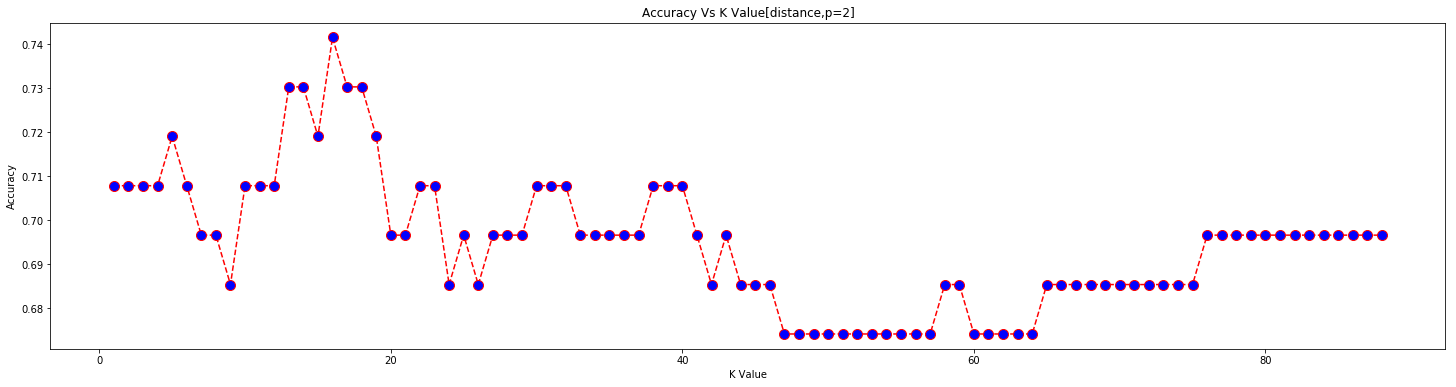

In [168]:
accuracy = []
for i in range(1, len(y_test)):
    knn = KNeighborsClassifier(n_neighbors=i,weights="distance",p=2)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
plt.figure(figsize=(25, 6))
plt.plot(range(1, len(y_test)), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Vs K Value[distance,p=2]')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [169]:
max_index=accuracy.index(max(accuracy))
for i in range(30):
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.40)
    knn = KNeighborsClassifier(n_neighbors=max_index+1,weights="distance",p=2)
    knn.fit(x_train_new, y_train_new)
    pred_i = knn.predict(x_test_new)
    print(metrics.accuracy_score(y_test_new, pred_i))

0.7222222222222222
0.6944444444444444
0.75
0.6388888888888888
0.75
0.7777777777777778
0.7777777777777778
0.75
0.6527777777777778
0.7361111111111112
0.7638888888888888
0.7222222222222222
0.7083333333333334
0.6944444444444444
0.7222222222222222
0.6388888888888888
0.7222222222222222
0.7916666666666666
0.7638888888888888
0.7638888888888888
0.7361111111111112
0.7083333333333334
0.75
0.7361111111111112
0.6527777777777778
0.6805555555555556
0.6666666666666666
0.625
0.6944444444444444
0.6805555555555556
